---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Compare Classifiers

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this exercise, we will compare the decision boundaries of several different classifiers.

First, we define a colormap to plot the dataset points that we will use:

In [2]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

We will use three randomly generated datasets using three different generation functions:

- make_classification
- make_moons
- make_circles

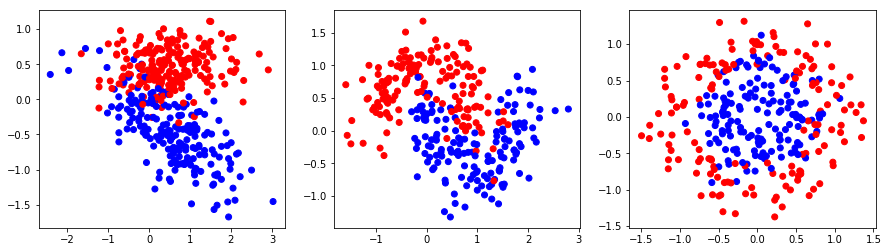

In [3]:
from sklearn.datasets import make_classification, make_moons, make_circles

linear = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2,
                           random_state=3, n_clusters_per_class=1, class_sep=0.5)

moons = make_moons(n_samples=300, noise=0.3, random_state=0)

circles = make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=1)

figure(figsize=(15,4))
i = 0
for dataset in [linear, moons, circles]:
    X, y = dataset
    i += 1
    subplot(1,3,i)
    scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

We will compare the decision boundaries of several different classifiers:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from collections import OrderedDict

models = OrderedDict([
          ('Knn 5', KNeighborsClassifier(5)),
          ('Naive Bayes', GaussianNB()),
          ('Logistic Regression', LogisticRegression()),
          ('Linear SVM', SVC(kernel='linear', probability=True)),
          ('Poly SVM', SVC(kernel='poly', degree=2, probability=True)),
          ('RBF SVM', SVC(kernel='rbf', gamma=2, C=1, probability=True)),
          ('Classification Tree', DecisionTreeClassifier(max_depth=5)),
          ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=50)),
          ('Multilayer Perceptron', MLPClassifier((4,3,2), activation='tanh',solver='adam', max_iter=10000,
                                                  learning_rate_init=0.01, random_state=0))
          ])

The next example shows the decision boundaries of the SVM classifier with RBF kernel when classifying the linear dataset.   
We use the method `predict_proba` to get the probability that the classifier assigned to each class.

Text(3.20977,-1.87252,u'.91')

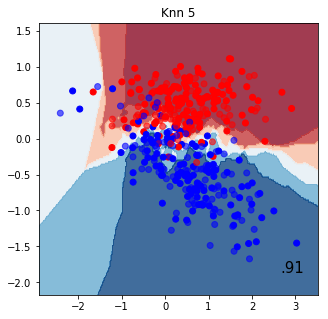

In [6]:
figure(figsize=(5, 5))

name = 'Knn 5'
clf = models[name]
dataset = linear

plt.title(name)

X, y = dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# create a mesh of points that cover the full graph area
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# use the classifier to predict the class of each mesh point
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] - 0.5
Z = Z.reshape(xx.shape)

# plot the decision boundary
norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
contourf(xx, yy, Z, 10, cmap=plt.cm.RdBu, alpha=.8, norm=norm)


# Plot also the training points
scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6)

# plot also the score
text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

## Exercise:

Plot the decision boundaries of the different classifiers for each dataset. 

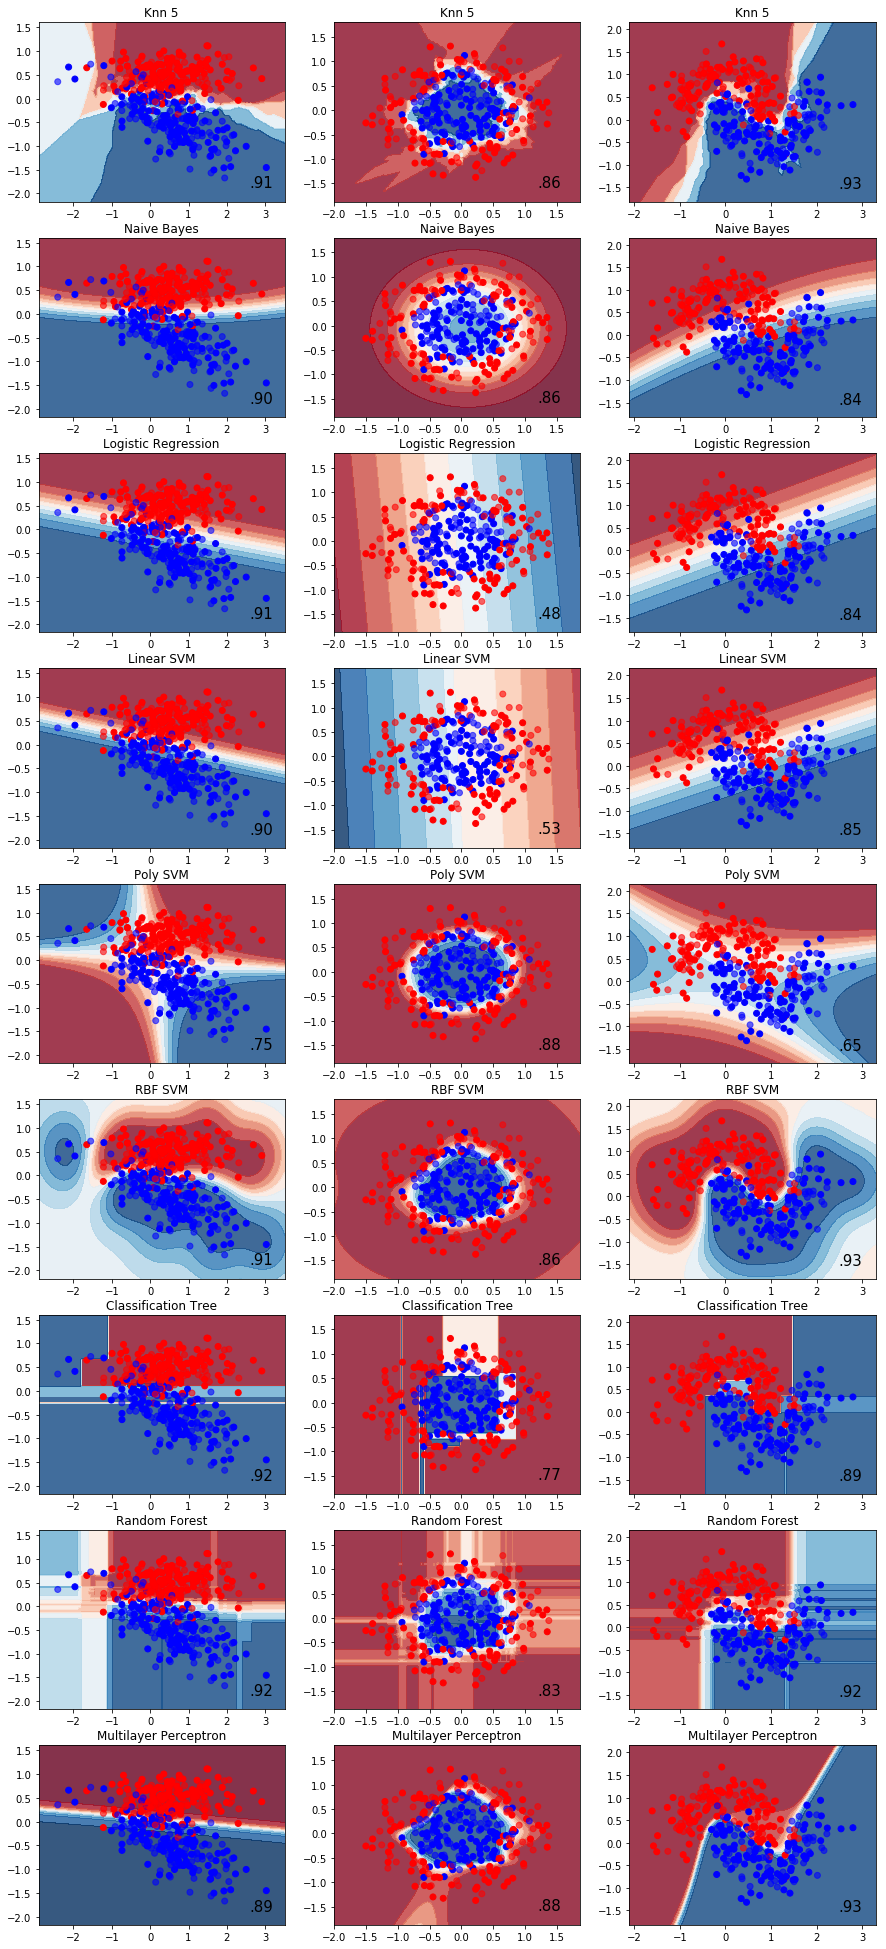

In [7]:
figure(figsize=(15, 35))

i = 0
for name, clf in models.items():
    for dataset in [linear, circles, moons]:
        
        i += 1
        plt.subplot(9, 3, i)
        
        
        
        plt.title(name)

        X, y = dataset
        
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # create a mesh of points that cover the full graph area
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = .02  # step size in the mesh
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        X_grid = np.c_[xx.ravel(), yy.ravel()]

        # use the classifier to predict the class of each mesh point
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] - 0.5
        Z = Z.reshape(xx.shape)

        # plot the decision boundary
        norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
        contourf(xx, yy, Z, 10, cmap=plt.cm.RdBu, alpha=.8, norm=norm)


        # Plot also the training points
        scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        # plot also the score
        text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                        size=15, horizontalalignment='right')